# **Sampling**

In statistics, sampling refers to the process of selecting a subset of individuals or observations from a larger population in order to make inferences or draw conclusions about the population as a whole. This is typically done when it is not feasible or practical to study the entire population, such as when the population is too large, too spread out, or too expensive to study.

<p align='center'>
  <a href="#"><img src='https://ihatepsm.com/sites/default/files/sampling%20picture%20mine.png' width=25%"></a>
</p>

The goal of sampling is to obtain a representative sample, meaning a subset of the population that accurately reflects the characteristics of the population as a whole. This is important because if the sample is not representative, the conclusions drawn from it may not be accurate or applicable to the population as a whole.



## Types of sampling:
- `simple random sampling`
- `stratified sampling`
- `cluster sampling`, and 
- `systematic sampling`

The choice of method depends on the research question, the characteristics of the population, and the available resources.

### `1. Simple Random Sampling`

In [71]:
import random

# Population data
population = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Sample size
sample_size = 5

# Simple Random Sampling
sample = random.sample(population, sample_size)

# Print sample
print("Sample:", sample)


Sample: [4, 8, 9, 1, 2]


In [72]:
import numpy as np

# setting seed
np.random.seed(42)

# Population data
population = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

# Sample size
sample_size = 5

# Simple Random Sampling
sample = np.random.choice(population, size=sample_size, replace=False)

# Print sample
print("Sample:", list(sample))


Sample: [10, 12, 1, 14, 6]


### `2. stratified sampling`

In [73]:
from sklearn.model_selection import StratifiedShuffleSplit
import pandas as pd

# Load dataset (as an example, we'll use the Iris dataset)
iris_df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
iris_df.columns = ['sepal_length', 'sepal_width',
                   'petal_length', 'petal_width', 'class']

# Separate features and target variable
X = iris_df.drop('class', axis=1)
y = iris_df['class']

# Create StratifiedShuffleSplit object
strat_split = StratifiedShuffleSplit(
    n_splits=1, test_size=0.2, random_state=42)

# Generate train and test indices
train_idx, test_idx = next(strat_split.split(X, y))

# Create training and test sets using the indices
X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
X_test, y_test = X.iloc[test_idx], y.iloc[test_idx]

# Print class distribution in the original dataset, training set, and test set
print('Class distribution in the original dataset:\n', y.value_counts(normalize=True))
print('\nClass distribution in the training set:\n', y_train.value_counts(normalize=True))
print('\nClass distribution in the test set:\n', y_test.value_counts(normalize=True))

Class distribution in the original dataset:
 Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: class, dtype: float64

Class distribution in the training set:
 Iris-setosa        0.333333
Iris-virginica     0.333333
Iris-versicolor    0.333333
Name: class, dtype: float64

Class distribution in the test set:
 Iris-setosa        0.333333
Iris-virginica     0.333333
Iris-versicolor    0.333333
Name: class, dtype: float64


The code uses the `StratifiedShuffleSplit` class from `sklearn.model_selection` to split the `Iris` dataset into `training` and `test_sets` **while preserving the class distribution in both sets**. The output shows that the class distribution is the same in the original dataset, training set, and test set.

### `3. Cluster Sampling`

In [74]:
import pandas as pd
import random

np.random.seed(42)

# Suppose we have a population of 1000 households in a city
population = pd.DataFrame({'household_id': range(1, 1001),
                           'neighborhood_id': [random.randint(1, 100) for _ in range(1000)],
                           'income': [random.randint(20000, 150000) for _ in range(1000)]})

# We want to estimate the average income of all households in the city
# using cluster sampling
cluster_size = 10  # Each cluster contains 10 households
num_clusters = 100  # There are 100 neighborhoods in the city
sample_size = 200  # We want a sample of 200 households

# Step 1: Select a random sample of 10 neighborhoods
cluster_ids = random.sample(range(1, num_clusters + 1), cluster_size)

# Step 2: Select all households within the selected neighborhoods
sample = population[population['neighborhood_id'].isin(cluster_ids)]

# Step 3: Randomly select 200 households from the selected clusters
sample = sample.sample(n=sample_size, replace=True)

# Step 4: Compute the sample mean income
sample_mean = sample['income'].mean()

# Step 5: Estimate the population mean income using the formula for cluster sampling
population_mean = sample_mean * (num_clusters / cluster_size)

print(f"Sample mean income: {sample_mean}")
print(f"Estimated population mean income: {population_mean}")

Sample mean income: 83058.63
Estimated population mean income: 830586.3


Cluster sampling is a sampling technique where the entire population is divided into groups, or clusters, and a random sample of these clusters is selected. All observations in the selected clusters are included in the sample. In this case, the clusters are neighborhoods and the observations are households.

First, it selects a random sample of neighborhoods (clusters). Then, it selects all households within the selected neighborhoods. Next, it randomly selects a sample of households from the selected clusters. Finally, it computes the sample mean income and estimates the population mean income using the formula for cluster sampling

### `4. systematic sampling`

Systematic sampling is a sampling method where every `k-th` element in the population is selected to be included in the sample.

This method is useful when a population is too large to be practically sampled exhaustively, but it is possible to establish an ordering of the elements in the population.

Systematic sampling can be used for both probability and non-probability sampling, depending on how the starting point for the sampling is chosen.

In [75]:
import pandas as pd
import random

# Suppose we have a population of 10,000 customers in a supermarket database
population = pd.DataFrame({'customer_id': range(1, 10001),
                           'loyalty_card': [random.choice(['Yes', 'No']) for _ in range(10000)],
                           'age': [random.randint(18, 90) for _ in range(10000)],
                           'gender': [random.choice(['M', 'F']) for _ in range(10000)]})

# We want to survey 500 customers using systematic sampling
sample_size = 500

# Step 1: Calculate the sampling interval
sampling_interval = len(population) // sample_size # floor division `7//2=3`

# Step 2: Choose a random starting point
start_point = random.randint(1, sampling_interval)

# Step 3: Select every kth element from the starting point
sample = population.iloc[start_point-1::sampling_interval]

# Step 4: Confirm the sample size
assert len(sample) == sample_size

print(sample.head())


    customer_id loyalty_card  age gender
18           19          Yes   60      M
38           39           No   41      F
58           59           No   43      F
78           79          Yes   78      M
98           99          Yes   68      F


**NOTE:** `k-th` is selected to be included in the sample as shown in the ouput.

## Confidence Intervals


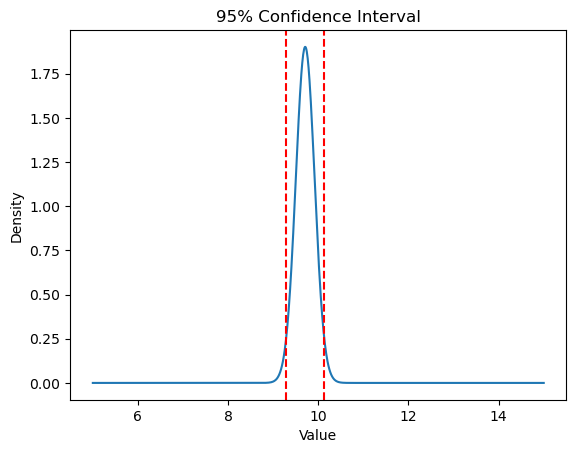

In [81]:
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt

# Generate a random sample of size n
n = 100
sample = np.random.normal(loc=10, scale=2, size=n)

# Calculate the sample mean and standard deviation
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)

# Calculate the t-value for a 95% confidence interval with n-1 degrees of freedom
t_value = t.ppf(0.975, df=n-1)

# Calculate the lower and upper bounds of the confidence interval
lower = sample_mean - t_value * sample_std / np.sqrt(n)
upper = sample_mean + t_value * sample_std / np.sqrt(n)

# Plot the sample distribution and the confidence interval
x = np.linspace(5, 15, 1000)
y = t.pdf(x, df=n-1, loc=sample_mean, scale=sample_std / np.sqrt(n))
plt.plot(x, y)
plt.axvline(lower, color='r', linestyle='--')
plt.axvline(upper, color='r', linestyle='--')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('95% Confidence Interval')
plt.show()

## `Sample Size Selection`

Sample size selection is the process of determining the appropriate size of a sample to achieve a certain level of precision and confidence in our estimates. 

Generally speaking, `larger` sample sizes lead to more `precise estimates` and narrower confidence intervals, but they also require more resources (time, money, etc.) to collect and analyze.

Here's an example of how to calculate the necessary sample size for a two-sample `t-test` with a `specified effect size`, `alpha level`, and power using Python's statsmodels module:

In [85]:
import statsmodels.stats.power as smp

# Set the parameters
effect_size = 0.5  # moderate effect size
alpha = 0.05  # significance level
power = 0.8  # power

# Calculate the sample size
nobs1 = smp.tt_ind_solve_power(
    effect_size=effect_size, alpha=alpha, power=power)

# Print the result
print(f"Sample size per group: {nobs1:.0f}")

Sample size per group: 64


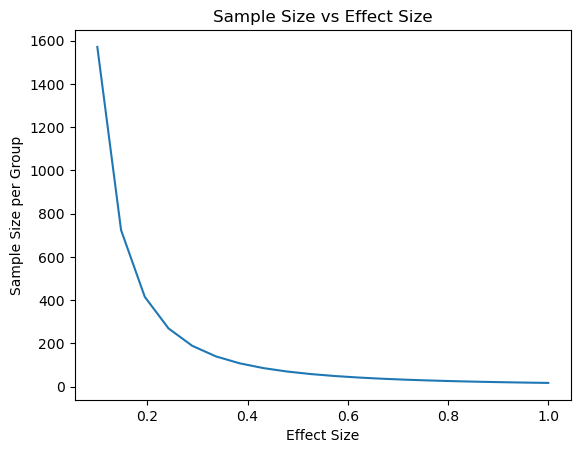

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.stats.power as smp

# Set the parameters
effect_sizes = np.linspace(0.1, 1, 20)  # range of effect sizes
alpha = 0.05  # significance level
power = 0.8  # power

# Calculate the sample sizes for each effect size
sample_sizes = []
for effect_size in effect_sizes:
    nobs1 = smp.tt_ind_solve_power(
        effect_size=effect_size, alpha=alpha, power=power)
    sample_sizes.append(nobs1)

# Create a plot of sample size vs effect size
plt.plot(effect_sizes, sample_sizes)
plt.xlabel('Effect Size')
plt.ylabel('Sample Size per Group')
plt.title('Sample Size vs Effect Size')
plt.show()

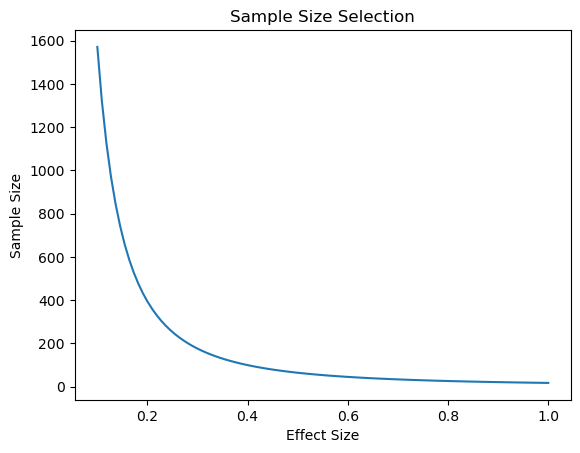

In [82]:
import numpy as np
from statsmodels.stats.power import tt_ind_solve_power
import matplotlib.pyplot as plt

# Define the effect size, alpha level, and power
effect_size = 0.5
alpha = 0.05
power = 0.8

# Calculate the necessary sample sizes for a range of effect sizes
effect_sizes = np.linspace(0.1, 1.0, 100)
sample_sizes = [tt_ind_solve_power(effect_size=es, alpha=alpha, power=power) for es in effect_sizes]

# Plot the relationship between effect size and sample size
plt.plot(effect_sizes, sample_sizes)
plt.xlabel('Effect Size')
plt.ylabel('Sample Size')
plt.title('Sample Size Selection')
plt.show()

## `Statistical Significance`

- Statistical significance refers to the likelihood that an observed effect in a sample is not due to chance.

- We use hypothesis testing to determine whether an observed effect is statistically significant or not. 

- The null hypothesis is typically that there is no difference between two groups or no effect of a certain treatment, and we calculate a `p-value` to determine the likelihood of observing the data we did if the null hypothesis were true. 

>If the `p-value` is below a certain significance level (usually 0.05), we reject the null hypothesis and conclude that the observed effect is statistically significant.

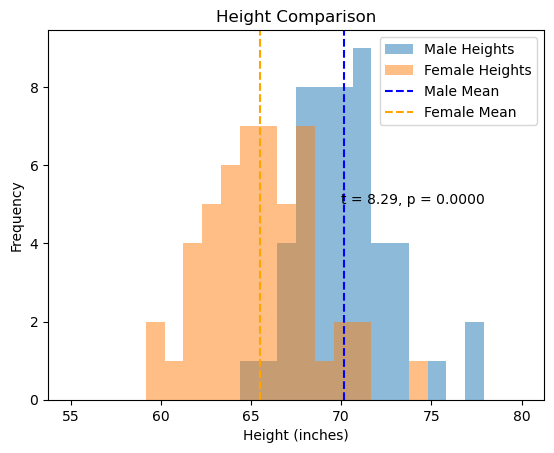

In [84]:
import numpy as np
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# Generate two random samples of heights
male_heights = np.random.normal(loc=70, scale=3, size=50)
female_heights = np.random.normal(loc=65, scale=3, size=50)

# Perform a two-sample t-test
t_stat, p_value = ttest_ind(male_heights, female_heights, equal_var=False)

# Create histograms of the two samples
bins = np.linspace(55, 80, 25)
plt.hist(male_heights, bins=bins, alpha=0.5, label='Male Heights')
plt.hist(female_heights, bins=bins, alpha=0.5, label='Female Heights')

# Add a line representing the mean of each sample
plt.axvline(np.mean(male_heights), color='b',
            linestyle='--', label='Male Mean')
plt.axvline(np.mean(female_heights), color='orange',
            linestyle='--', label='Female Mean')

# Add a legend and labels
plt.legend()
plt.xlabel('Height (inches)')
plt.ylabel('Frequency')
plt.title('Height Comparison')
plt.text(70, 5, f"t = {t_stat:.2f}, p = {p_value:.4f}")

# Show the plot
plt.show()